In [1]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s              
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 199 kB 50.6 MB/s            
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=70f311a3e6d140900fd638f3ad4b3f22531a30d11f3d92a89940c7c69e3c4c60
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.3
    Uninstalling py4j-0.10.9.3:
      Successfully uninstalled py4j-0.10.9.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

In [4]:
DATASET_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles']


In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName('FRS').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/21 00:46:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
spark

In [8]:
df_pyspark = spark.read.option('header','true').csv(DATASET_PATH + "styles.csv", inferSchema=True).limit(5000)

In [9]:
df_pyspark.show()

+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+
|   id|gender|masterCategory|subCategory| articleType|baseColour|season|year| usage|  productDisplayName|
+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+
|15970|   Men|       Apparel|    Topwear|      Shirts| Navy Blue|  Fall|2011|Casual|Turtle Check Men ...|
|39386|   Men|       Apparel| Bottomwear|       Jeans|      Blue|Summer|2012|Casual|Peter England Men...|
|59263| Women|   Accessories|    Watches|     Watches|    Silver|Winter|2016|Casual|Titan Women Silve...|
|21379|   Men|       Apparel| Bottomwear| Track Pants|     Black|  Fall|2011|Casual|Manchester United...|
|53759|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|2012|Casual|Puma Men Grey T-s...|
| 1855|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|2011|Casual|Inkfruit Mens Cha...|
|30805|   Men|       Apparel|    Topwear|     

In [10]:
df_pyspark.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- masterCategory: string (nullable = true)
 |-- subCategory: string (nullable = true)
 |-- articleType: string (nullable = true)
 |-- baseColour: string (nullable = true)
 |-- season: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- usage: string (nullable = true)
 |-- productDisplayName: string (nullable = true)



In [11]:
df_pyspark.head(3)

[Row(id=15970, gender='Men', masterCategory='Apparel', subCategory='Topwear', articleType='Shirts', baseColour='Navy Blue', season='Fall', year=2011, usage='Casual', productDisplayName='Turtle Check Men Navy Blue Shirt'),
 Row(id=39386, gender='Men', masterCategory='Apparel', subCategory='Bottomwear', articleType='Jeans', baseColour='Blue', season='Summer', year=2012, usage='Casual', productDisplayName='Peter England Men Party Blue Jeans'),
 Row(id=59263, gender='Women', masterCategory='Accessories', subCategory='Watches', articleType='Watches', baseColour='Silver', season='Winter', year=2016, usage='Casual', productDisplayName='Titan Women Silver Watch')]

In [12]:
df_pyspark.select(['id','gender']).show()

+-----+------+
|   id|gender|
+-----+------+
|15970|   Men|
|39386|   Men|
|59263| Women|
|21379|   Men|
|53759|   Men|
| 1855|   Men|
|30805|   Men|
|26960| Women|
|29114|   Men|
|30039|   Men|
| 9204|   Men|
|48123| Women|
|18653|   Men|
|47957| Women|
|46885|  Boys|
|12369|   Men|
|29928|   Men|
|42419| Girls|
|51832| Women|
|47359| Women|
+-----+------+
only showing top 20 rows



In [13]:
from pyspark.sql.functions import concat, col, lit
df_pyspark = df_pyspark.withColumn('image',concat(df_pyspark['id'],lit('.jpg')))

In [14]:
df_pyspark.show()

+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+---------+
|   id|gender|masterCategory|subCategory| articleType|baseColour|season|year| usage|  productDisplayName|    image|
+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+---------+
|15970|   Men|       Apparel|    Topwear|      Shirts| Navy Blue|  Fall|2011|Casual|Turtle Check Men ...|15970.jpg|
|39386|   Men|       Apparel| Bottomwear|       Jeans|      Blue|Summer|2012|Casual|Peter England Men...|39386.jpg|
|59263| Women|   Accessories|    Watches|     Watches|    Silver|Winter|2016|Casual|Titan Women Silve...|59263.jpg|
|21379|   Men|       Apparel| Bottomwear| Track Pants|     Black|  Fall|2011|Casual|Manchester United...|21379.jpg|
|53759|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|2012|Casual|Puma Men Grey T-s...|53759.jpg|
| 1855|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|

In [15]:
import pandas as pd
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
df = df_pyspark.toPandas()

22/12/21 00:46:14 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


In [16]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

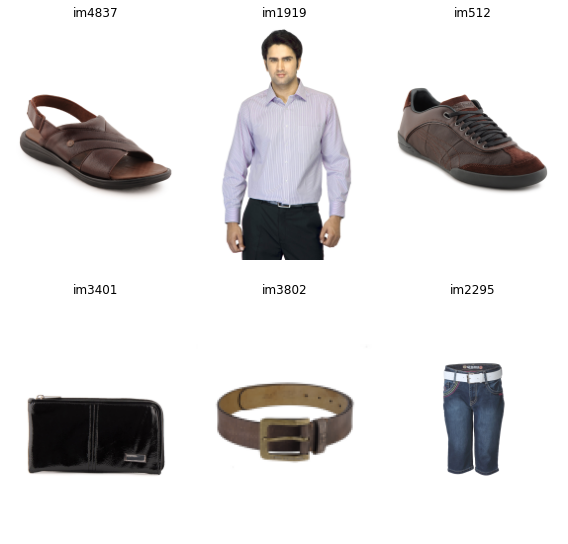

In [17]:
import matplotlib.pyplot as plt
import numpy as np

figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
plot_figures(figures, 2, 3)

<AxesSubplot:>

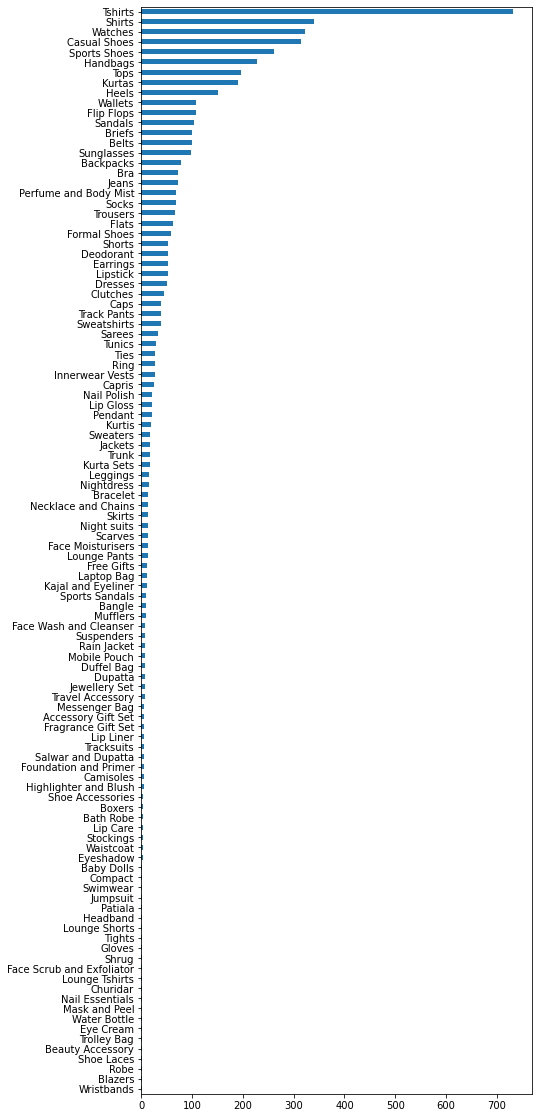

In [18]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [19]:
import tensorflow as tf
import keras
from keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.6.2'

In [20]:
img_width, img_height, _ = 224, 224, 3
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
def get_embedding(model, img_name):
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    x   = image.img_to_array(img)
    x   = np.expand_dims(x, axis=0)
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [22]:
emb = get_embedding(model, df.iloc[0].image)
emb.shape

2022-12-21 00:46:28.001734: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(2048,)

(240, 180, 3)
[ 5.661307   2.366157   0.        ...  1.3138657  0.        10.820532 ]


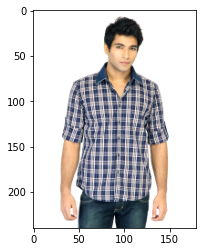

In [23]:
img_array = load_image(df.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [24]:
df.shape

(5000, 11)

In [25]:
%%time
df_sample      = df
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

(5000, 2048)
CPU times: user 35min 52s, sys: 59.1 s, total: 36min 51s
Wall time: 18min 16s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.661307,2.366157,0.000000,3.255745,0.845214,2.673839,8.780895,6.280786,0.787186,1.587660,...,2.463607,0.000000,1.825990,20.485281,3.902868,0.000000,8.225988,1.313866,0.000000,10.820532
1,5.790409,9.593645,0.000000,9.431673,0.287240,0.259942,17.028765,3.037457,0.136345,0.000000,...,1.670576,0.013897,10.338687,4.784717,0.189141,0.000000,7.739139,0.372709,0.000000,8.903803
2,0.000000,3.162248,0.484689,0.172307,2.609551,3.840855,3.426144,0.253235,1.098894,1.418286,...,0.434925,14.092844,3.018757,2.134505,2.549047,0.377386,6.180365,0.636625,14.018163,11.415052
3,5.882219,1.958619,0.000000,12.519888,0.000000,0.000000,9.383587,3.781627,0.000000,1.490627,...,17.825491,0.000000,3.592508,2.042310,0.000000,0.000000,6.656786,1.457308,1.694212,1.403327
4,0.245965,17.383436,0.493823,3.374469,2.567368,0.000000,6.482541,5.862638,0.000000,3.164861,...,4.464013,0.447084,1.448139,12.884146,0.000000,0.397491,5.028077,1.939696,0.000000,11.485394


In [26]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
4995,44573,Men,Footwear,Sandal,Sandals,Brown,Summer,2012,Casual,Coolers Men Brown Sandals,44573.jpg
4996,37081,Women,Accessories,Bags,Handbags,Brown,Summer,2012,Casual,Lino Perros Women Brown Handbag,37081.jpg
4997,57958,Women,Apparel,Saree,Sarees,Green,Summer,2012,Ethnic,Prafful Green Printed Sari,57958.jpg
4998,5654,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Reebok Men's Winning Stride White Shoe,5654.jpg


In [27]:
from sklearn.metrics.pairwise import pairwise_distances
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.7134498 , 0.4542724 , 0.6797062 ],
       [0.7134498 , 0.9999994 , 0.41515315, 0.83330894],
       [0.4542724 , 0.41515315, 0.99999905, 0.44629484],
       [0.6797062 , 0.83330894, 0.44629484, 0.9999997 ]], dtype=float32)

In [28]:
indices = pd.Series(range(len(df)), index=df.index)
indices
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.9236281, 0.9223267, 0.91904205, 0.91508716, 0.9131173])

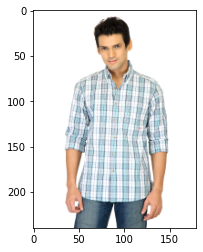

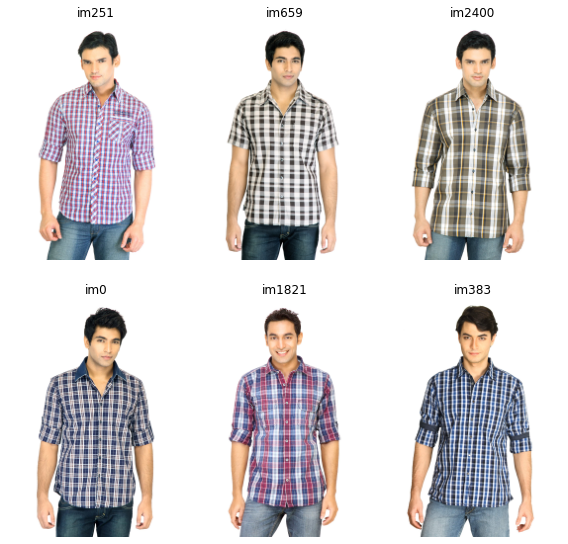

In [29]:
idx_ref = 2993
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
plot_figures(figures, 2, 3)

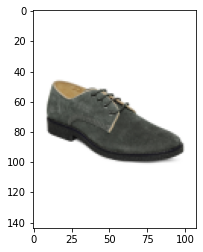

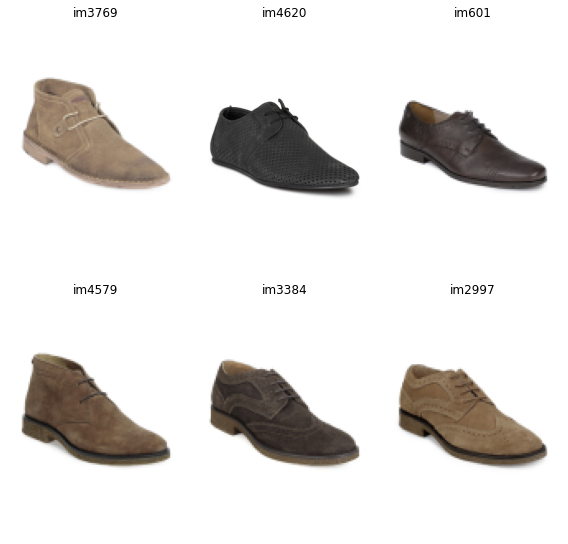

In [30]:
idx_ref = 876
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
plot_figures(figures, 2, 3)